In [1]:
import pandas as pd


In [2]:
#Import the necessary libraries
import pandas as pd # Loading dataset
import numpy as np #Perform numerical calculations
import matplotlib.pyplot as plt #Python visualizations
import seaborn as sns #Statistical visualizations
from scipy import stats #Statistical inferencing
from statsmodels.stats.outliers_influence import variance_inflation_factor #Checking for multicollinearity
from statsmodels.tools.tools import add_constant #Adding y-intercept to our model
from statsmodels.formula.api import ols #Linear Regression
import statsmodels.api as sm #ANOVA/ F-Statistic
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler #Preprocessing data before ML
from sklearn.model_selection import train_test_split, GridSearchCV #split our data, get the best model parameters
from sklearn.linear_model import LinearRegression, Ridge, Lasso #Linear Regression
from sklearn.tree import DecisionTreeRegressor #Tree model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor #Ensembling model
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score #Model evaluators
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
# Correct imports - note the capitalization
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('../data/processed/crypto_data_features_labels.csv')
data.head() 

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator,future_return,label,label_name
0,2023-09-12,25162.53,26567.00,25131.48,25840.10,56434.38537,2023-09-12 23:59:59.999,1.464393e+09,1047056,27720.51830,...,-512.111919,26068.5745,27576.7890,27630.36120,27129.522592,25007.626408,32.748983,0.014779,1,HOLD
1,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,-448.682032,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602,0.011469,1,HOLD
2,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,-369.883209,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862,0.002913,1,HOLD
3,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,-297.767058,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788,-0.001516,1,HOLD
4,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,-241.089650,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095,-0.001211,1,HOLD


In [5]:
data.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'num_trades', 'taker_base_volume',
       'taker_quote_volume', '1_day_return', '7_day_volatility',
       '1_day_volatility', 'rsi', 'macd', 'sma20', 'sma50', 'sma200',
       'bb_high', 'bb_low', 'stochastic_oscillator', 'future_return', 'label',
       'label_name'],
      dtype='object')

In [6]:
# name X and y features and labels
X = data.drop(columns=['label','open_time','label_name','close_time'],axis=1)
y = data['label']

In [7]:
X.head()

,open,high,low,close,volume,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume,1_day_return,...,1_day_volatility,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator,future_return
0,25162.53,26567.00,25131.48,25840.10,56434.38537,1.464393e+09,1047056,27720.51830,7.191473e+08,0.026928,...,0.019610,42.780295,-512.111919,26068.5745,27576.7890,27630.36120,27129.522592,25007.626408,32.748983,0.014779
1,25840.10,26405.22,25764.17,26222.00,31610.82753,8.254379e+08,714880,15287.00038,3.990998e+08,0.014779,...,0.019838,47.503163,-448.682032,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602,0.011469
2,26222.00,26860.49,26126.77,26522.73,38333.17250,1.015267e+09,799278,19440.45467,5.148638e+08,0.011469,...,0.019959,50.937343,-369.883209,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862,0.002913
3,26522.73,26888.00,26224.00,26600.00,26227.29369,6.952033e+08,654094,12600.39115,3.340459e+08,0.002913,...,0.019949,51.809649,-297.767058,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788,-0.001516
4,26599.99,26777.00,26445.00,26559.67,13960.93351,3.708899e+08,526416,6508.91352,1.729268e+08,-0.001516,...,0.019748,51.297010,-241.089650,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095,-0.001211


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3927
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 21
[LightGBM] [Info] Start training from score -1.862029
[LightGBM] [Info] Start training from score -0.444614
[LightGBM] [Info] Start training from score -1.591738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

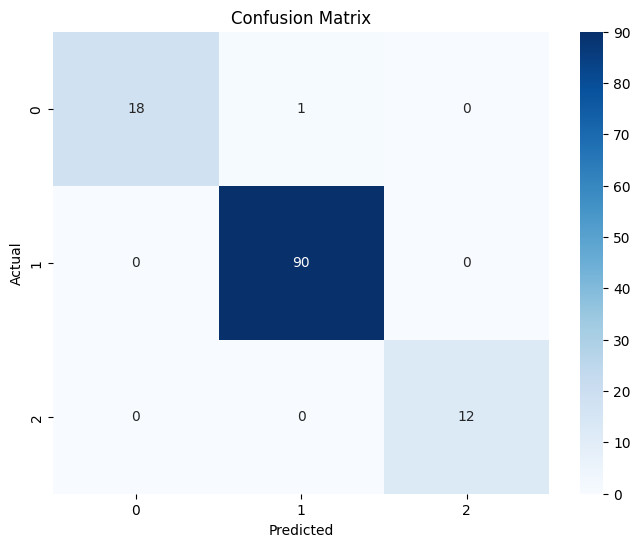

In [8]:
#Use: - 70% training - 15% validation - 15% test\
#**No shuffling** because cryptocurrency is time-series data
train_size = 0.7
val_size = 0.15
test_size = 0.15
train_end = int(len(X) * train_size)
val_end = int(len(X) * (train_size + val_size))
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]  
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Create target variable 'y': 1 if next day's close price is higher, else 0
data['y'] = (data['close'].shift(-1) > data['close']).astype(int)

In [10]:
#balance our classes before training the model
from sklearn.utils import resample

from sklearn.utils import resample
import pandas as pd

# Keep only the selected feature columns + target
columns_to_keep = [
    'close', 'volume', 'num_trades', '1_day_return',
    '7_day_volatility', 'macd', 'sma20', 
    'bb_high', 'stochastic_oscillator', 'y'
]

#what does the 'y' column represent here?
#represents the target variable for classification, indicating different classes or outcomes we want to predict based on the features.

df = data[columns_to_keep].dropna()

# Split data into majority and minority classes
df_majority = df[df.y == df.y.value_counts().idxmax()]
df_minority = df[df.y == df.y.value_counts().idxmin()]

# Upsample minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,     # sample with replacement
    n_samples=len(df_majority), 
    random_state=42
)

# Combine majority and upsampled minority
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Before balancing:")
print(df['y'].value_counts())

print("\nAfter balancing:")
print(df_balanced['y'].value_counts())

Before balancing:
y
1    419
0    382
Name: count, dtype: int64

After balancing:
y
1    419
0    419
Name: count, dtype: int64


In [11]:
#perform train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#train a random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 23   0   0]
 [  1 108   0]
 [  0   0  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.99      1.00       109
           2       1.00      1.00      1.00        29

    accuracy                           0.99       161
   macro avg       0.99      1.00      0.99       161
weighted avg       0.99      0.99      0.99       161



In [13]:
# Keep only the selected feature columns 
columns_to_keep = data[[
    'close', 'volume', 'num_trades', '1_day_return',
    '7_day_volatility', 'macd', 'sma20', 
    'bb_high', 'stochastic_oscillator'
]]

In [16]:
#split into X and y(target)
X = columns_to_keep
y = data['label']

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1683
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

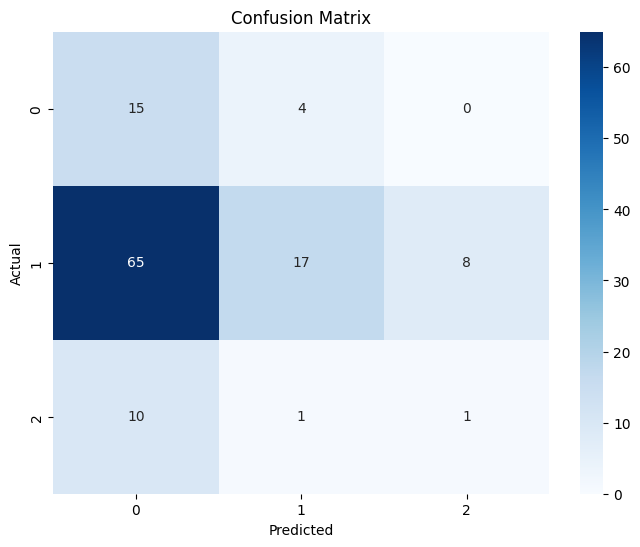

In [17]:

train_size = 0.7
val_size = 0.15
test_size = 0.15
train_end = int(len(X) * train_size)
val_end = int(len(X) * (train_size + val_size))
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]  
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\Users\BRENDA MUTAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [11:24:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Accuracy: 0.31
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.79      0.28        19
           1       0.74      0.26      0.38        90
           2       0.00      0.00      0.00        12

    accuracy                           0.31       121
   macro avg       0.30      0.35      0.22       121
weighted avg       0.58      0.31      0.33       121



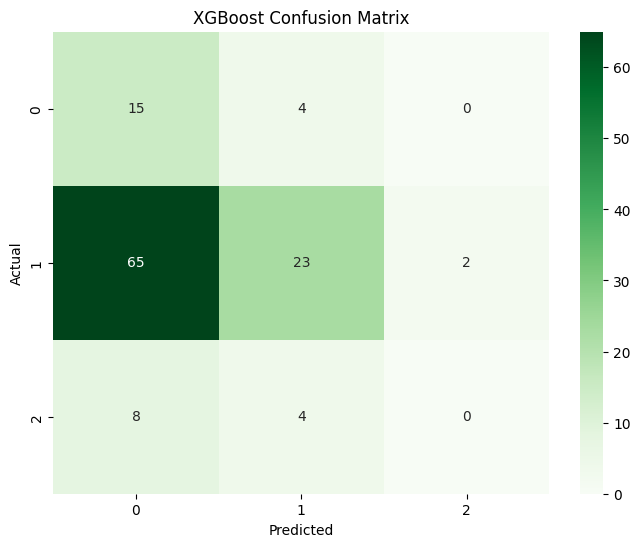

In [18]:
#train model  xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)  
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {accuracy_xgb:.2f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

Random Forest Test Accuracy: 0.52
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.37      0.23        19
           1       0.73      0.62      0.67        90
           2       0.00      0.00      0.00        12

    accuracy                           0.52       121
   macro avg       0.30      0.33      0.30       121
weighted avg       0.57      0.52      0.53       121



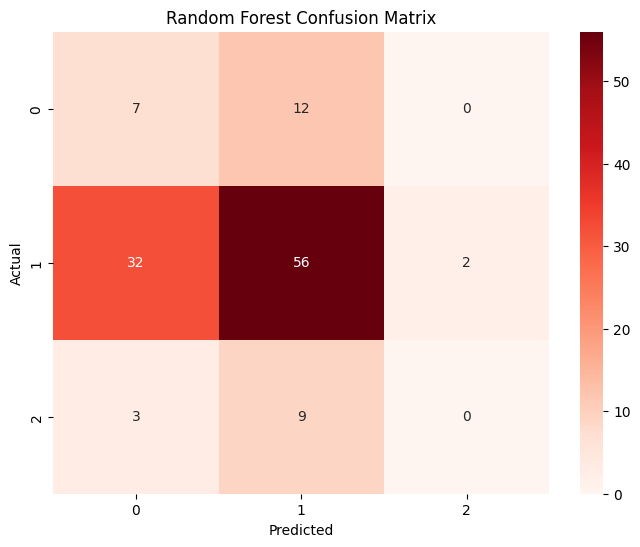

In [21]:
# train model random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)  
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

CatBoost Test Accuracy: 0.59
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.21      0.17        19
           1       0.72      0.74      0.73        90
           2       0.00      0.00      0.00        12

    accuracy                           0.59       121
   macro avg       0.29      0.32      0.30       121
weighted avg       0.56      0.59      0.57       121



C:\Users\BRENDA MUTAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\BRENDA MUTAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\BRENDA MUTAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\

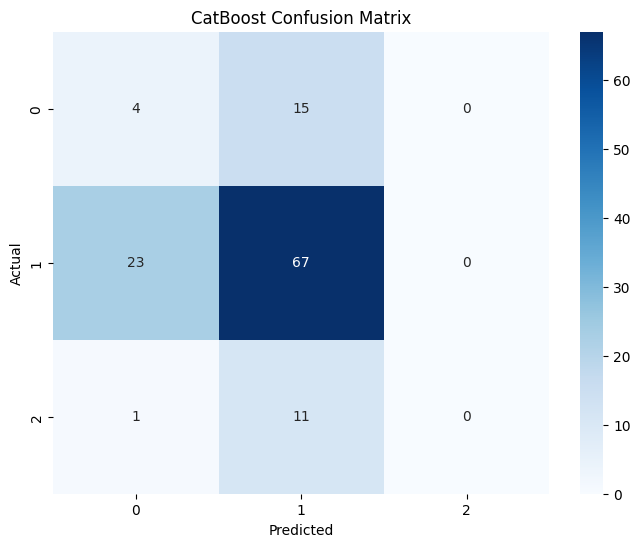

In [20]:
#train model catboost
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=0, class_weights=[1, 1, 1])
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Test Accuracy: {accuracy_cat:.2f}")
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()

In [26]:
#lstm
#reshape input data for lstm
#build lstm model
#evaluate on test set
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0],
                                            X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0],
                                          X_test.shape[1], 1))
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,
                     input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=3, activation='softmax'))
lstm_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)
# Evaluate on test set  
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_accuracy:.2f}")
print("LSTM Classification Report:")
y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=-1)
print(classification_report(y_test, y_pred_lstm))


C:\Users\BRENDA MUTAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5536 - loss: 0.9574
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6411 - loss: 0.9115
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6411 - loss: 0.9025
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6411 - loss: 0.9061
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6411 - loss: 0.9039
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6411 - loss: 0.9056
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6411 - loss: 0.9026
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6411 - loss: 0.9068
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6411 - loss: 0.9079
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6411 - loss: 0.8994
LSTM Test Accuracy: 0.74
LSTM Classification Report:
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step
              precision    recall  f1-score   support

 

C:\Users\BRENDA MUTAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\BRENDA MUTAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\BRENDA MUTAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\